<a href="https://www.kaggle.com/code/rkmaurya93/road-accident-risk?scriptVersionId=267001533" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv',index_col=0)

In [3]:
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.shape

(517754, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


In [6]:
df.isnull().sum()

road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

# looking for information:

In [7]:
cat_cols=df.select_dtypes(include='object').columns

In [8]:
df[cat_cols].head()

,road_type,lighting,weather,time_of_day
id,,,,
0,urban,daylight,rainy,afternoon
1,urban,daylight,clear,evening
2,rural,dim,clear,morning
3,highway,dim,rainy,morning
4,rural,daylight,foggy,evening


In [9]:
for i in cat_cols:
    print(i,df[i].value_counts())

road_type road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
lighting lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
weather weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
time_of_day time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64


In [10]:
df[cat_cols].nunique()

road_type      3
lighting       3
weather        3
time_of_day    3
dtype: int64

In [11]:
cat_cols

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [12]:
df.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


# Encoding the categorical columns:

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
oe=OrdinalEncoder()

In [15]:
df[cat_cols]=oe.fit_transform(df[cat_cols])

In [16]:
df[cat_cols].head()

,road_type,lighting,weather,time_of_day
id,,,,
0,2.0,0.0,2.0,0.0
1,2.0,0.0,0.0,1.0
2,1.0,1.0,0.0,2.0
3,0.0,1.0,2.0,2.0
4,1.0,0.0,1.0,1.0


# plotting the numerical columns:

In [17]:
num_cols=df.select_dtypes(include='number').columns

In [18]:
df[num_cols].head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,time_of_day,num_reported_accidents,accident_risk
id,,,,,,,,,
0,2.0,2,0.06,35,0.0,2.0,0.0,1,0.13
1,2.0,4,0.99,35,0.0,0.0,1.0,0,0.35
2,1.0,4,0.63,70,1.0,0.0,2.0,2,0.30
3,0.0,4,0.07,35,1.0,2.0,2.0,1,0.21
4,1.0,1,0.58,60,0.0,1.0,1.0,1,0.56


In [19]:
df[num_cols].corr()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,time_of_day,num_reported_accidents,accident_risk
road_type,1.000000,0.000716,0.011119,0.010309,0.005365,0.013775,-0.001541,0.001545,0.018899
num_lanes,0.000716,1.000000,-0.020245,0.001194,-0.000509,-0.005843,-0.001705,0.017662,-0.006003
curvature,0.011119,-0.020245,1.000000,0.008399,-0.003847,-0.045971,-0.000109,0.145034,0.543946
speed_limit,0.010309,0.001194,0.008399,1.000000,-0.069114,-0.090608,-0.003903,0.031373,0.430898
lighting,0.005365,-0.000509,-0.003847,-0.069114,1.000000,-0.054055,0.005445,0.040029,0.393860
weather,0.013775,-0.005843,-0.045971,-0.090608,-0.054055,1.000000,0.006228,0.043942,0.130064
time_of_day,-0.001541,-0.001705,-0.000109,-0.003903,0.005445,0.006228,1.000000,-0.002844,-0.001165
num_reported_accidents,0.001545,0.017662,0.145034,0.031373,0.040029,0.043942,-0.002844,1.000000,0.213891
accident_risk,0.018899,-0.006003,0.543946,0.430898,0.393860,0.130064,-0.001165,0.213891,1.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

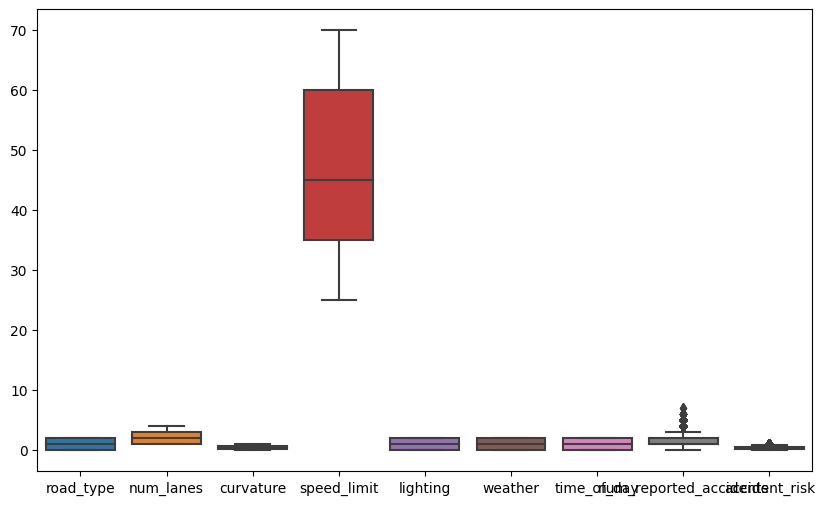

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


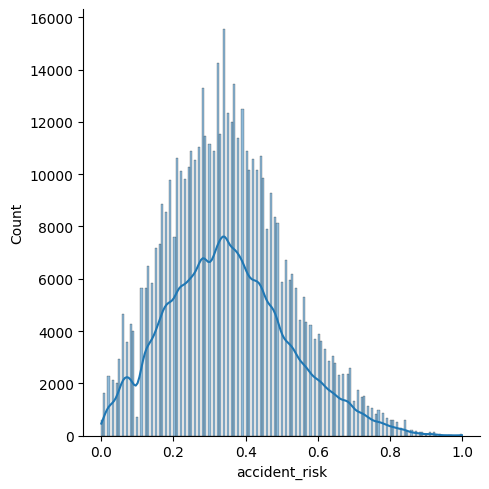

In [22]:
sns.displot(df['accident_risk'],kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


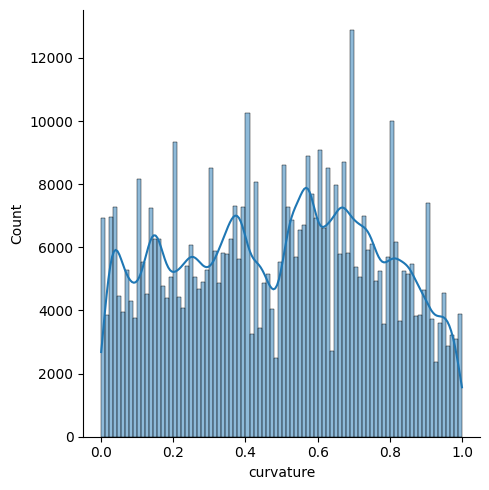

In [23]:
sns.displot(df['curvature'],kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


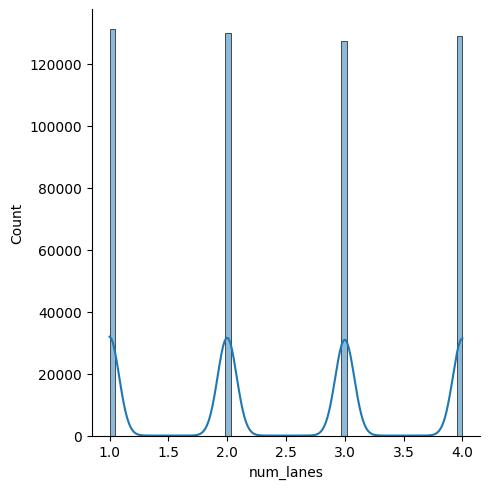

In [24]:
sns.displot(df['num_lanes'],kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


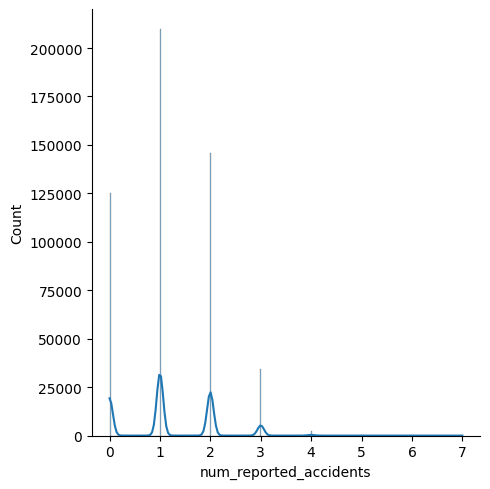

In [25]:
sns.displot(df['num_reported_accidents'],kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


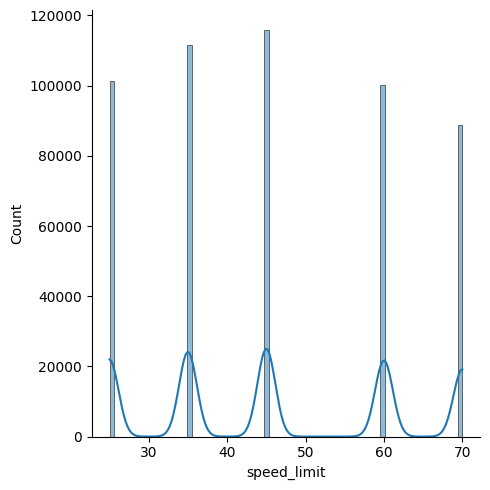

In [26]:
sns.displot(df['speed_limit'],kde=True)

# Encoding the boolean columns:

In [27]:
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,2.0,2,0.06,35,0.0,2.0,False,True,0.0,False,True,1,0.13
1,2.0,4,0.99,35,0.0,0.0,True,False,1.0,True,True,0,0.35
2,1.0,4,0.63,70,1.0,0.0,False,True,2.0,True,False,2,0.30
3,0.0,4,0.07,35,1.0,2.0,True,True,2.0,False,False,1,0.21
4,1.0,1,0.58,60,0.0,1.0,False,False,1.0,True,False,1,0.56


In [28]:
bool_cols=df.select_dtypes(include='bool').columns
bool_cols

Index(['road_signs_present', 'public_road', 'holiday', 'school_season'], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in bool_cols:
    df[i]=le.fit_transform(df[i])

# Finding correlation:

In [30]:
df.corr()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
road_type,1.000000,0.000716,0.011119,0.010309,0.005365,0.013775,0.000959,-0.000924,-0.001541,-0.001644,0.000023,0.001545,0.018899
num_lanes,0.000716,1.000000,-0.020245,0.001194,-0.000509,-0.005843,-0.000498,-0.002041,-0.001705,0.002544,-0.001081,0.017662,-0.006003
curvature,0.011119,-0.020245,1.000000,0.008399,-0.003847,-0.045971,0.017168,0.048220,-0.000109,0.063931,-0.004502,0.145034,0.543946
speed_limit,0.010309,0.001194,0.008399,1.000000,-0.069114,-0.090608,-0.004461,0.011497,-0.003903,0.010992,0.004392,0.031373,0.430898
lighting,0.005365,-0.000509,-0.003847,-0.069114,1.000000,-0.054055,-0.007570,-0.000420,0.005445,0.015338,-0.001671,0.040029,0.393860
weather,0.013775,-0.005843,-0.045971,-0.090608,-0.054055,1.000000,0.005317,0.011778,0.006228,0.024137,0.000912,0.043942,0.130064
road_signs_present,0.000959,-0.000498,0.017168,-0.004461,-0.007570,0.005317,1.000000,0.003828,0.007965,-0.003813,0.002287,-0.000162,0.000629
public_road,-0.000924,-0.002041,0.048220,0.011497,-0.000420,0.011778,0.003828,1.000000,0.002311,-0.007920,0.004117,-0.007026,0.031032
time_of_day,-0.001541,-0.001705,-0.000109,-0.003903,0.005445,0.006228,0.007965,0.002311,1.000000,0.004604,0.010915,-0.002844,-0.001165
holiday,-0.001644,0.002544,0.063931,0.010992,0.015338,0.024137,-0.003813,-0.007920,0.004604,1.000000,-0.001514,-0.015053,0.051129


In [31]:
corr_matrix=df.corr()

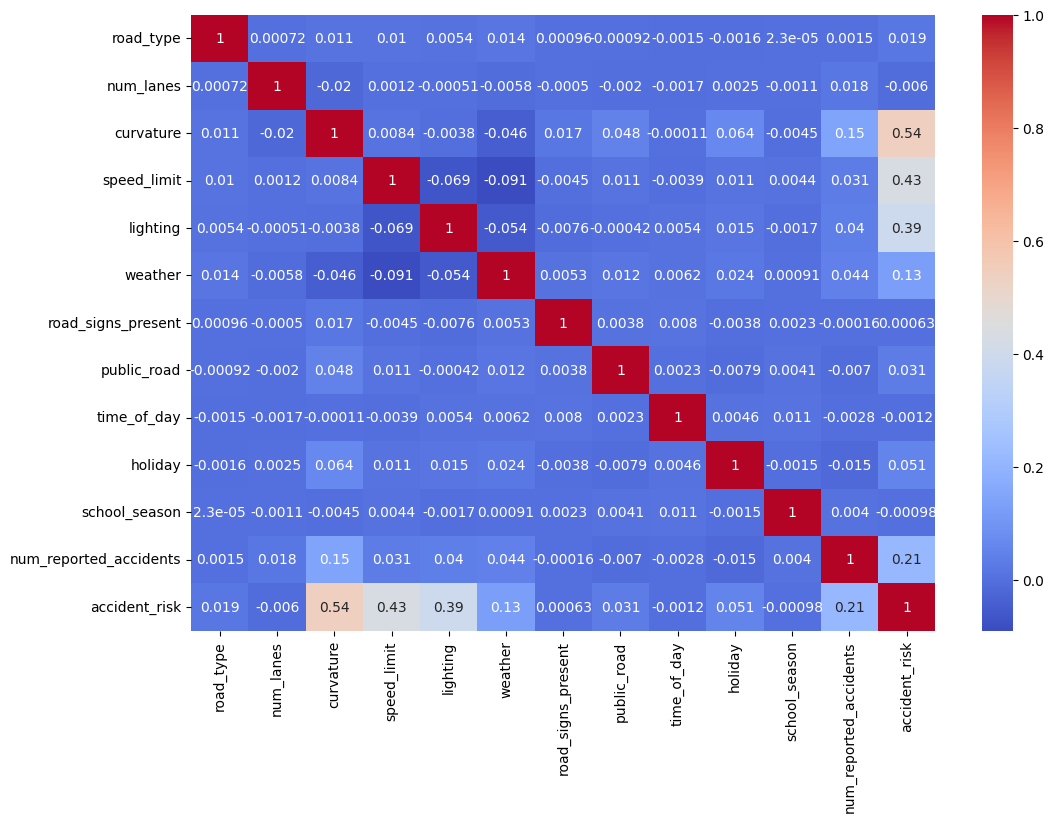

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [33]:
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,2.0,2,0.06,35,0.0,2.0,0,1,0.0,0,1,1,0.13
1,2.0,4,0.99,35,0.0,0.0,1,0,1.0,1,1,0,0.35
2,1.0,4,0.63,70,1.0,0.0,0,1,2.0,1,0,2,0.30
3,0.0,4,0.07,35,1.0,2.0,1,1,2.0,0,0,1,0.21
4,1.0,1,0.58,60,0.0,1.0,0,0,1.0,1,0,1,0.56


# Splitting the dataset:

In [34]:
x=df.drop('accident_risk',axis=1)
y=df['accident_risk']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
143159,1.0,2,0.43,60,1.0,0.0,0,0,0.0,1,1,2
20172,0.0,4,0.18,25,2.0,0.0,0,0,0.0,1,0,1
57926,2.0,1,0.20,70,2.0,0.0,0,1,2.0,1,1,1
193319,2.0,3,0.81,60,0.0,1.0,1,0,1.0,1,1,1
213938,1.0,3,0.43,35,2.0,2.0,0,1,2.0,1,1,2


In [37]:
y_train

id
143159    0.28
20172     0.27
57926     0.51
193319    0.58
213938    0.42
          ... 
259178    0.22
365838    0.47
131932    0.61
146867    0.84
121958    0.50
Name: accident_risk, Length: 414203, dtype: float64

# Apply Standard Scalar:

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Training the model:

### using XGBoost:


In [39]:
from xgboost import XGBRegressor

In [40]:
model=XGBRegressor()

In [41]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse=mean_squared_error(y_test,y_pred)

In [45]:
import numpy as np
rmse=np.sqrt(mse)

In [46]:
rmse

0.056297349469026384

# importing the test data:

In [47]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv',index_col=0)

In [48]:
x_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
143159,1.0,2,0.43,60,1.0,0.0,0,0,0.0,1,1,2
20172,0.0,4,0.18,25,2.0,0.0,0,0,0.0,1,0,1
57926,2.0,1,0.20,70,2.0,0.0,0,1,2.0,1,1,1
193319,2.0,3,0.81,60,0.0,1.0,1,0,1.0,1,1,1
213938,1.0,3,0.43,35,2.0,2.0,0,1,2.0,1,1,2


In [49]:
df_test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


# Categorical columns:

In [50]:
df_test[cat_cols].head()

,road_type,lighting,weather,time_of_day
id,,,,
517754,highway,night,clear,afternoon
517755,urban,dim,foggy,afternoon
517756,urban,dim,clear,afternoon
517757,rural,daylight,rainy,afternoon
517758,highway,daylight,clear,evening


In [51]:
df_test[cat_cols].nunique()

road_type      3
lighting       3
weather        3
time_of_day    3
dtype: int64

In [52]:
df_test[cat_cols]=oe.fit_transform(df_test[cat_cols])

# Boolean columns:

In [53]:
df_test[bool_cols].head()

,road_signs_present,public_road,holiday,school_season
id,,,,
517754,True,True,True,True
517755,True,False,True,False
517756,True,False,True,True
517757,False,False,False,False
517758,True,False,False,True


In [54]:
df_test.isnull().sum()

road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64

In [55]:
for i in bool_cols:
    df_test[i]=le.fit_transform(df_test[i])

# Predictions:

In [56]:
df_test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
517754,0.0,2,0.34,45,2.0,0.0,1,1,0.0,1,1,1
517755,2.0,3,0.04,45,1.0,1.0,1,0,0.0,1,0,0
517756,2.0,2,0.59,35,1.0,0.0,1,0,0.0,1,1,1
517757,1.0,4,0.95,35,0.0,2.0,0,0,0.0,0,0,2
517758,0.0,2,0.86,35,0.0,0.0,1,0,1.0,0,1,3


In [57]:
y_pred_test=model.predict(df_test) 

In [58]:
y_pred_test

array([0.29072025, 0.12205602, 0.18645884, ..., 0.25024462, 0.12581296,
       0.48462713], dtype=float32)

In [59]:
pd.DataFrame(y_pred_test,columns=['accident_risk'],index=df_test.index).to_csv('submission.csv')